In [1]:
import getdist
import pylab as mplot
import numpy as np
import astropy.io.fits as pf
%pylab inline

mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')

from getdist.mcsamples import MCSamplesFromCobaya
from getdist.mcsamples import loadMCSamples
import os
from getdist import plots, MCSamples

import matplotlib
%matplotlib inline
# matplotlib.use('TkAgg')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def load_chain_info(file):
    import subprocess
    with open(file) as f:
        first_line = f.readline()
    a = first_line.split("\t")
    Name = []
    for i in range(0,len(a)-3):
        print("[%02d] %s"%(i,a[i].split('--')[1]))
        Name.append(a[i].split('--')[1])
    for i in range(len(a)-3,len(a)):
        print("[%02d] %s"%(i,a[i]))
        
    print(subprocess.check_output(['tail', '-5', file]).decode('ascii').split('\n')[0].split('=')[1] )
    
    nlines = int(subprocess.check_output(['tail', '-5', file]).decode('ascii').split('\n')[0].split('=')[1] )
    chain  = np.loadtxt(file)
    return chain, nlines, Name

# polychord
def load_chain_info2(file):
    import subprocess
    with open(file) as f:
        first_line = f.readline()
    a = first_line.split("\t")
    Name = []
    for i in range(0,len(a)-4):
        print("[%02d] %s"%(i,a[i].split('--')[1]))
        Name.append(a[i].split('--')[1])
    for i in range(len(a)-4,len(a)):
        print("[%02d] %s"%(i,a[i]))
        
    print(subprocess.check_output(['tail', '-6', file]).decode('ascii').split('\n')[0].split('=')[1] )
    
    nlines = int(subprocess.check_output(['tail', '-6', file]).decode('ascii').split('\n')[0].split('=')[1] )
    chain  = np.loadtxt(file)
    return chain, nlines, Name



In [3]:
def weighted_percentile(data, percents, weights=None):

    if weights is None:
        return np.percentile(data, percents)
    ind = np.argsort(data)
    d = data[ind]
    w = weights[ind]
    p = 1.*w.cumsum()/w.sum()*100
    y = np.interp(percents, p, d)
    return y

def print_constraints(s8, w):
    low = weighted_percentile(s8, 16, weights=w)
    high = weighted_percentile(s8, 84, weights=w)
    mean = np.average(s8, weights=w)
    print("$%.4f_{-%.4f}^{+%.4f}$" % (mean, mean-low, high-mean))

In [4]:
chain_dir = '/project/chihway/chihway/CosmicShearCosmosis/analysis/delve-campaign/'

# fiducial, sim, fixed nuisance
c_0, n_0, name_0 = load_chain_info(chain_dir+'sim_fiducial-cuts_20240901/fiducial-cuts.txt')
# fiducial, sim, all nuisance
c_1, n_1, name_1 = load_chain_info(chain_dir+'sim_fiducial-full_20240901/fiducial-full.txt')
# fiducial, sim, fix m
c_2, n_2, name_2 = load_chain_info(chain_dir+'sim_fiducial-fix-m_20240901/fiducial-fix-m.txt')
# fiducial, sim, fix z
c_3, n_3, name_3 = load_chain_info(chain_dir+'sim_fiducial-fix-dz_20240901/fiducial-fix-dz.txt')
# fiducial, sim, fix ia
c_4, n_4, name_4 = load_chain_info(chain_dir+'sim_fiducial-fix-ia_20240901/fiducial-fix-ia.txt')


[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] a1
[07] alpha1
[08] SIGMA_8
[09] SIGMA_12
[10] 2PT_CHI2
[11] log_weight
[12] prior
[13] post

12600
[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] m1
[07] m2
[08] m3
[09] m4
[10] bias_1
[11] bias_2
[12] bias_3
[13] bias_4
[14] a1
[15] alpha1
[16] SIGMA_8
[17] SIGMA_12
[18] 2PT_CHI2
[19] log_weight
[20] prior
[21] post

14600
[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] bias_1
[07] bias_2
[08] bias_3
[09] bias_4
[10] a1
[11] alpha1
[12] SIGMA_8
[13] SIGMA_12
[14] 2PT_CHI2
[15] log_weight
[16] prior
[17] post

13500
[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] m1
[07] m2
[08] m3
[09] m4
[10] a1
[11] alpha1
[12] SIGMA_8
[13] SIGMA_12
[14] 2PT_CHI2
[15] log_weight
[16] prior
[17] post

12900
[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] m1
[07] m2
[08] m3
[09] m4
[10] bias_1
[11] bias_2
[12] bias_3
[13] bias_4
[14] SIGMA_8
[15] SI

## Plot chains with different level of systematics

In [5]:
fid_0 = MCSamples(samples = np.c_[c_0[:,0],c_0[:,8], c_0[:,8]*np.sqrt(c_0[:,0]/0.3)],
                weights = np.exp(c_0[:,11]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "Fixed m and dz")

fid_1 = MCSamples(samples = np.c_[c_1[:,0],c_1[:,16], c_1[:,16]*np.sqrt(c_1[:,0]/0.3)],
                weights = np.exp(c_1[:,19]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "Free systematics")

fid_2 = MCSamples(samples = np.c_[c_2[:,0],c_2[:,12], c_2[:,12]*np.sqrt(c_2[:,0]/0.3)],
                weights = np.exp(c_2[:,15]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "Fixed m")

fid_3 = MCSamples(samples = np.c_[c_3[:,0],c_3[:,12], c_3[:,12]*np.sqrt(c_3[:,0]/0.3)],
                weights = np.exp(c_3[:,15]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "Fixed dz")

fid_4 = MCSamples(samples = np.c_[c_4[:,0],c_4[:,14], c_4[:,14]*np.sqrt(c_4[:,0]/0.3)],
                weights = np.exp(c_4[:,17]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "Fixed IA")



Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


## Fiducial

fiducial S_8 = 0.829\pm 0.022
contaminated S_8 = 0.829\pm 0.023
no cut S_8 = 0.829\pm 0.023
contaminated no cut S_8 = 0.829\pm 0.022


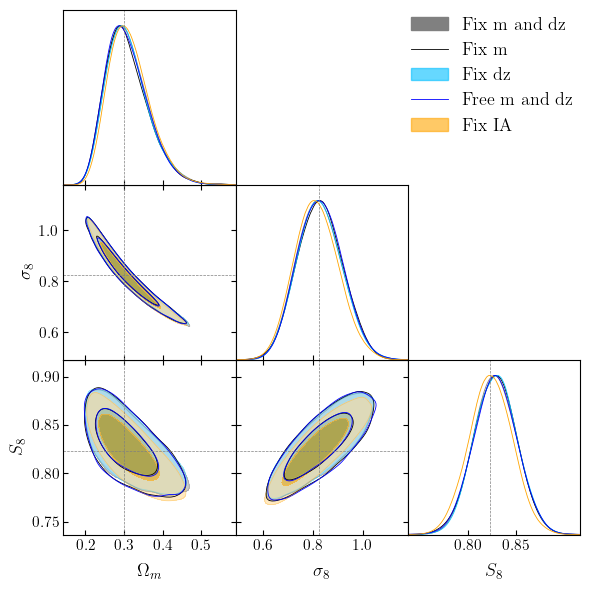

In [8]:
g = plots.get_subplot_plotter(width_inch=6)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.axes_labelsize=16
g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([fid_0, fid_2, fid_3, fid_1, fid_4],
                ['omegam','sigma8', 'S8'], 
                filled=[True, False, True, False, True],
                alpha=[1, 1, 1, 1, 1],
                lw = [0,3,0,3, 0],
                legend_labels=["Fix m and dz", "Fix m", "Fix dz", "Free m and dz", "Fix IA"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'k', 'deepskyblue', 'blue', "orange"],
                markers={'omegam':0.3, 'sigma8': 0.82355, 'S8':0.82355})


print('fiducial', fid_0.getInlineLatex('S8',limit=1))
print('contaminated', fid_1.getInlineLatex('S8',limit=1))
print('no cut', fid_2.getInlineLatex('S8',limit=1))
print('contaminated no cut', fid_3.getInlineLatex('S8',limit=1))

mplot.savefig('systematics_20240901.pdf', bbox_inches='tight')

# add truth?